## Titanic task

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline
#import split
from sklearn.model_selection import train_test_split
#import regression 
from sklearn.linear_model import LogisticRegression
#import Random forest
from sklearn.ensemble import RandomForestClassifier
#liner regression
from sklearn.linear_model import LinearRegression
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
#read the datasets named gender.csv ,train.csv and test.csv
gender=pd.read_csv('gender.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
#check the head of each  dataset
print(gender.head())
print(train.head())
print(test.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  S

In [5]:
#check the info of each dataset
gender.info()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtype

In [6]:
#chek the null values
gender.isnull().sum()
train.isnull().sum()    
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#remove the null values
train.dropna(inplace=True)
test.dropna(inplace=True)
gender.dropna(inplace=True) 

In [8]:
#check the null values
gender.isnull().sum()
train.isnull().sum()    
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
#check the columns of each dataset
gender.columns
train.columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Vistalizations of the data

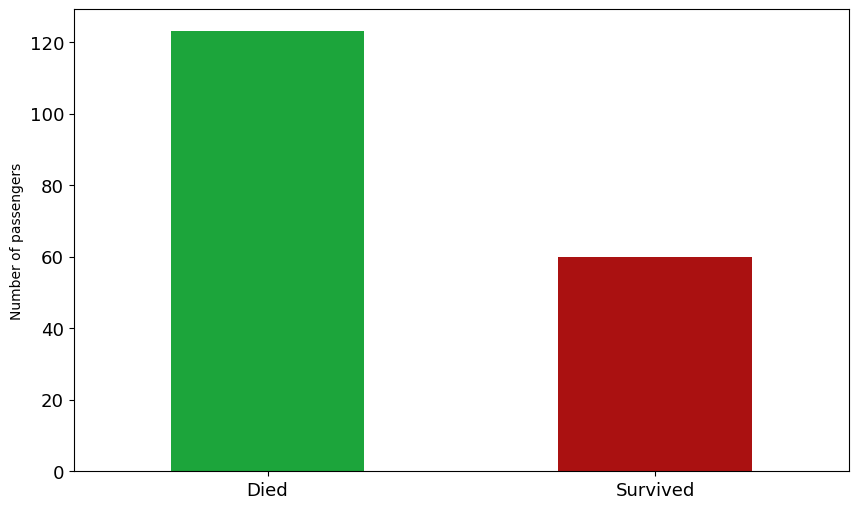

In [11]:
#use matplotlib to check the distribution between those who survived and the dead ones
ax=train['Survived'].value_counts().plot(kind='bar',figsize=(10,6),fontsize=13,color=['#1CA53B','#AA1111'])
ax.set_xticklabels(['Died','Survived'],rotation=0)
ax.set_ylabel('Number of passengers')
plt.show()

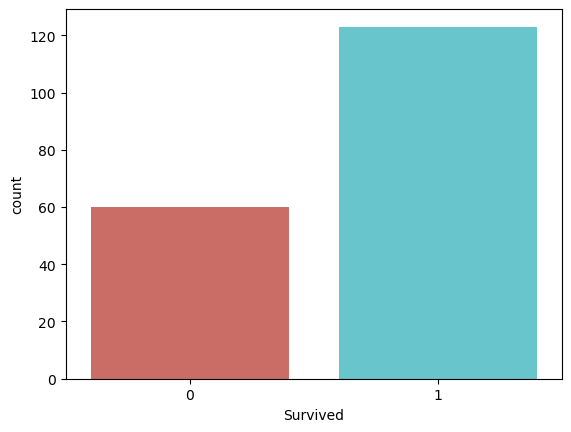

In [12]:
#use seaborn to check the distribution between those who survived and the dead ones
sns.countplot(x='Survived',data=train,palette='hls')
plt.show()
    

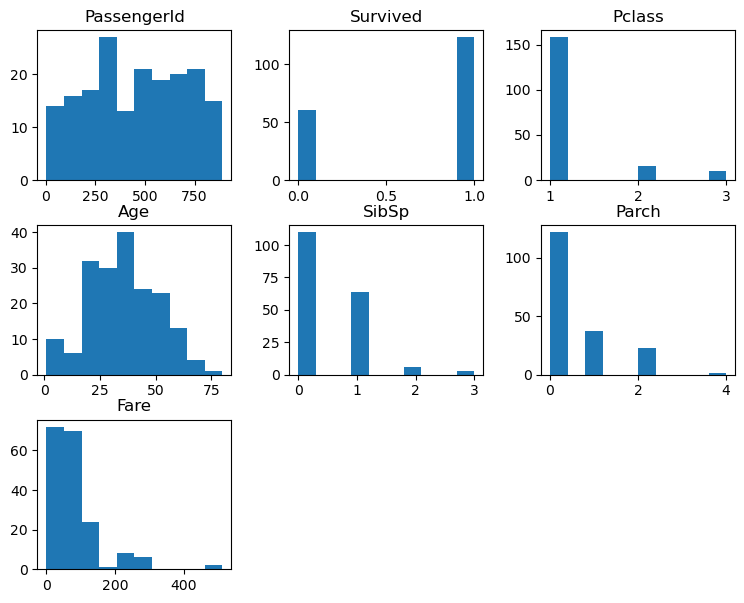

In [13]:
#use histogram to check the distribution between the dead ones and the survived ones
train.hist(bins=10,figsize=(9,7),grid=False)
plt.show()
